In [ ]:
1) track daily crypto mentions by specific influencers
2) track historical and current crypto trends
3) see if there is a corralation between price spikes and twiitter mentions, and if so how many days it is offset

In [93]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime

In [94]:
from config1 import consumer_key, consumer_secret, crypto_key


In [5]:
#old stuff
base_url="https://api.polygon.io/v2/aggs/ticker/AAPL/range/1/day/2020-06-01/2020-06-17?apiKey=ui4pRrbHr7mNiqyn6tBCURIIGdQjjWEl"
base_url="https://api.polygon.io/v3/reference/tickers?apiKey=ui4pRrbHr7mNiqyn6tBCURIIGdQjjWEl"

base_url="https://api.polygon.io/v2/aggs/ticker/DASH/prev?adjusted=true&apiKey=ui4pRrbHr7mNiqyn6tBCURIIGdQjjWEl"

base_url="http://rest.coinapi.io/v1/exchangerate/ALICE?apikey=54244F72-7D5F-4173-ADBC-B15B53191244"

base_url="http://rest.coinapi.io/v1/assets?apikey=54244F72-7D5F-4173-ADBC-B15B53191244"

base_url="https://api.polygon.io/v3/reference/tickers?apiKey=ui4pRrbHr7mNiqyn6tBCURIIGdQjjWEl"

base_url='https://api.polygon.io/v1/historic/forex/BTC/USD/2021-10-14?limit=100&apiKey=ui4pRrbHr7mNiqyn6tBCURIIGdQjjWEl'
    




In [6]:
#old stuff
c=requests.get(base_url).json()

In [95]:
#old stuff
#df = pd.DataFrame(c['rates'])

In [11]:
from bs4 import BeautifulSoup
import tweepy

In [12]:
influencers=['Anthony Pompliano', 'Erik Voorhees',
'Ty Smith', 'Tone Vays',
'CryptoCobain',
'Tyler Winklevoss',
'Vitalik Buterin',
'CryptoWendyO',
'StackingUSD',
'Girl Gone Crypto',
'Euclid and Oaks',
'David Gokhshtein',
'Hailey Lennon',
'Justin Sun',
'Ivan on Tech',
'Kenn Bosak',
'CryptoBrekkie',
'Scott Melker',
'TheCryptoDog',
'BitBoy Crypto',
'Dan Held',
'PeterMcCormack',
'LayahHeilpern',
'Coinbound']

In [98]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
api = tweepy.API(auth)

In [7]:
try:
    redirect_url = auth.get_authorization_url()
    print('success')
except tweepy.TweepError:
    print('Error! Failed to get request token.')

success


In [103]:
tweets = api.user_timeline(screen_name="ClairaJulia", 
                           # 200 is the maximum allowed count
                           count=200,
                           include_rts = False,
                           # Necessary to keep full_text 
                           # otherwise only the first 140 words are extracted
                           tweet_mode = 'extended'
                           )

In [104]:
tweets

[Status(_api=<tweepy.api.API object at 0x7fb4b2416320>, _json={'created_at': 'Fri Dec 03 16:59:19 +0000 2021', 'id': 1466814315374137347, 'id_str': '1466814315374137347', 'full_text': 'testing', 'truncated': False, 'display_text_range': [0, 7], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': []}, 'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 1445246645889748996, 'id_str': '1445246645889748996', 'name': 'Julia Claira', 'screen_name': 'ClairaJulia', 'location': '97222', 'description': '', 'url': 'https://t.co/tWv4gJOmAF', 'entities': {'url': {'urls': [{'url': 'https://t.co/tWv4gJOmAF', 'expanded_url': 'http://www.julianck.com', 'display_url': 'julianck.com', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 0, 

In [105]:
for info in tweets[:5]:
     print("ID: {}".format(info.id))
     print(info.created_at)
     print(info.full_text)
     print("\n")

ID: 1466814315374137347
2021-12-03 16:59:19+00:00
testing




In [47]:
import urllib.request
url = "https://api.nomics.com/v1/currencies/ticker?key=" + crypto_key + "&ids=ALICE&interval=1d,30d&convert=USD&per-page=200&page=1"
print(urllib.request.urlopen(url).read())


b'[{"id":"ALICE","currency":"ALICE","symbol":"ALICE","name":"Alice Finance","logo_url":"","status":"active","platform_currency":"ETH","price":"21.15898164","price_date":"2021-12-03T00:00:00Z","price_timestamp":"2021-12-03T05:42:00Z","market_cap_dominance":"0.0000","num_exchanges":"41","num_pairs":"56","num_pairs_unmapped":"0","first_candle":"2021-02-13T00:00:00Z","first_trade":"2021-02-13T00:00:00Z","first_order_book":"2021-03-15T00:00:00Z","first_priced_at":"2021-02-15T15:13:11.463416Z","rank":"1938","rank_delta":"-20","high":"27.48218193","high_timestamp":"2021-11-24T00:00:00Z","1d":{"volume":"158661667.17","price_change":"-0.35809620","price_change_pct":"-0.0166","volume_change":"-45251810.96","volume_change_pct":"-0.2219"},"30d":{"volume":"3459843629.99","price_change":"6.89896338","price_change_pct":"0.4838","volume_change":"2304880195.35","volume_change_pct":"1.9956"}}]\n'


In [109]:
url="https://min-api.cryptocompare.com/data/v2/histoday?fsym=KMD&tsym=USD&limit=7&api_key=0aef86b70e6092ab15386d2bc845370e8836a810f1b65ece64a09b5e48d6c9f1"



In [110]:
my_data=requests.get(url).json()

In [111]:
my_data

{'Response': 'Success',
 'Message': '',
 'HasWarning': False,
 'Type': 100,
 'RateLimit': {},
 'Data': {'Aggregated': False,
  'TimeFrom': 1637884800,
  'TimeTo': 1638489600,
  'Data': [{'time': 1637884800,
    'high': 1.15,
    'low': 0.8974,
    'open': 1.004,
    'volumefrom': 907573.43,
    'volumeto': 874301.48,
    'close': 0.9633,
    'conversionType': 'multiply',
    'conversionSymbol': 'ETH'},
   {'time': 1637971200,
    'high': 1.062,
    'low': 0.9283,
    'open': 0.9633,
    'volumefrom': 534906.38,
    'volumeto': 546125.88,
    'close': 1.021,
    'conversionType': 'multiply',
    'conversionSymbol': 'ETH'},
   {'time': 1638057600,
    'high': 1.076,
    'low': 0.949,
    'open': 1.021,
    'volumefrom': 328691.49,
    'volumeto': 315453.62,
    'close': 0.9597,
    'conversionType': 'multiply',
    'conversionSymbol': 'ETH'},
   {'time': 1638144000,
    'high': 1.013,
    'low': 0.9613,
    'open': 0.9597,
    'volumefrom': 891533.35,
    'volumeto': 866962.61,
    'clos

In [112]:
df=pd.DataFrame(my_data['Data']['Data'])

In [113]:
df.dtypes

time                  int64
high                float64
low                 float64
open                float64
volumefrom          float64
volumeto            float64
close               float64
conversionType       object
conversionSymbol     object
dtype: object

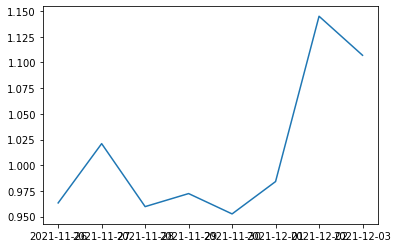

In [114]:
plt.plot(pd.to_datetime(df['time'], unit='s'),df.close)

#### my_data

In [120]:
df['time']=pd.to_datetime(df['time'], unit='s')

In [121]:
#gmt time zone 7 or 8 hours ahead of me
df

,time,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol
0,2021-11-26,1.150,0.8974,1.0040,907573.43,874301.48,0.9633,multiply,ETH
1,2021-11-27,1.062,0.9283,0.9633,534906.38,546125.88,1.0210,multiply,ETH
2,2021-11-28,1.076,0.9490,1.0210,328691.49,315453.62,0.9597,multiply,ETH
3,2021-11-29,1.013,0.9613,0.9597,891533.35,866962.61,0.9724,multiply,ETH
4,2021-11-30,1.013,0.9457,0.9724,328410.92,312849.91,0.9526,multiply,ETH
5,2021-12-01,1.004,0.9194,0.9526,423296.04,416553.03,0.9841,multiply,ETH
6,2021-12-02,1.660,0.9341,0.9841,2050789.89,2348058.61,1.1450,multiply,ETH
7,2021-12-03,1.277,1.0300,1.1420,6392673.49,7074621.82,1.1070,multiply,BTC
